In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data2 = pd.read_csv("data/brca_data_w_subtypes.csv")
data2.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


In [3]:
data2.shape

(705, 1941)

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1941 entries, rs_CLEC3A to histological.type
dtypes: float64(827), int64(1110), object(4)
memory usage: 10.4+ MB


In [5]:
column_names = ", ".join(data2.columns)
print("Columns in data2:\n")
print(column_names)

Columns in data2:

rs_CLEC3A, rs_CPB1, rs_SCGB2A2, rs_SCGB1D2, rs_TFF1, rs_MUCL1, rs_GSTM1, rs_PIP, rs_ADIPOQ, rs_ADH1B, rs_S100A7, rs_HMGCS2, rs_CYP2B7P1, rs_ANKRD30A, rs_PRAME, rs_TAT, rs_SERPINA6, rs_AGR3, rs_TFAP2B, rs_CYP4Z1, rs_DHRS2, rs_KCNJ3, rs_MYBPC1, rs_C4orf7, rs_KRT14, rs_MUC6, rs_UGT2B11, rs_GABRP, rs_SOX10, rs_SLC30A8, rs_STAC2, rs_VSTM2A, rs_COL2A1, rs_KRT5, rs_TUSC5, rs_CEACAM5, rs_CALML5, rs_GP2, rs_GSTT1, rs_LEP, rs_FABP7, rs_C1orf64, rs_CRABP1, rs_FABP4, rs_KRT6B, rs_KLK11, rs_CST9, rs_CST1, rs_PIGR, rs_CIDEC, rs_SYT13, rs_KLK5, rs_OLFM4, rs_HOXB13, rs_LTF, rs_TFF3, rs_MUC5B, rs_BMPR1B, rs_CEACAM6, rs_TCN1, rs_SLC34A2, rs_CRISP3, rs_CLCA2, rs_AGR2, rs_ABCC11, rs_GRIA2, rs_KRT17, rs_NPY1R, rs_C20orf114, rs_DSG3, rs_OBP2B, rs_KIF1A, rs_CYP4F8, rs_TNNT1, rs_LRP2, rs_PROM1, rs_PVALB, rs_FAM5C, rs_ELF5, rs_GFRA1, rs_CYP2A6, rs_PGR, rs_CGA, rs_GPD1, rs_VGLL1, rs_PLIN1, rs_CP, rs_KCNC2, rs_MUC16, rs_KRT6A, rs_ALB, rs_AQP5, rs_WIF1, rs_KLK6, rs_KLK7, rs_CBLN2, rs_KRT81, rs_

In [6]:
missing = data2.isnull().sum()
missing = missing[missing>0]

if missing.empty:
    print("No missing values in the dataset")
else:
    print("Missing values detected: \n")
    print(missing)

Missing values detected: 

PR.Status            122
ER.Status            122
HER2.Final.Status    145
dtype: int64


In [7]:
for col in ['PR.Status', 'ER.Status', 'HER2.Final.Status']:
    data2[col] = data2[col].fillna(data2[col].mode()[0])

In [8]:
missing = data2.isnull().sum()
missing = missing[missing>0]

if missing.empty:
    print("No missing values in the dataset")
else:
    print("Missing values detected: \n")
    print(missing)

No missing values in the dataset


In [9]:
data2.describe()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,4.547197,6.487979,9.516678,7.351940,8.179439,7.806726,5.677454,8.721931,7.450675,7.747601,...,0.008589,0.004734,0.059332,-0.094355,0.109583,-0.028409,0.048929,-0.002065,0.019180,0.133333
std,4.971708,4.874769,4.758348,4.248440,4.291915,4.325965,4.331351,4.130467,4.244499,4.245585,...,0.254308,0.302194,0.544589,0.579644,0.811079,0.555587,0.377429,0.345646,0.291446,0.340176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.918200,-1.432959,-1.637550,-3.017238,-2.646594,-2.152630,-0.751501,-1.334300,-1.182336,0.000000
25%,0.000000,2.297602,5.937361,3.842758,5.144707,4.612299,1.436695,5.784499,4.171967,4.688113,...,-0.141888,-0.168875,-0.276563,-0.302937,-0.426244,-0.317636,-0.207172,-0.232004,-0.147140,0.000000
50%,2.379261,6.002963,10.011822,7.701500,9.043774,7.530813,5.866248,9.305378,7.999344,8.277510,...,-0.022655,0.006428,0.084549,-0.067906,-0.005234,-0.067527,-0.039654,-0.010013,0.006341,0.000000
75%,8.025802,9.503384,13.087360,10.493654,11.536532,11.157128,10.132437,11.948430,10.559780,10.785635,...,0.136848,0.183828,0.413358,0.180853,0.573340,0.206411,0.211573,0.212412,0.172476,0.000000
max,17.432087,20.960773,20.978437,19.979807,17.338611,19.132935,14.702210,18.662764,17.355330,17.892925,...,1.051862,1.483391,2.349841,2.069048,3.043258,2.475027,1.664292,1.545965,1.062551,1.000000


In [10]:
categorical_cols = data2.select_dtypes(include=['object']).columns
numerical_cols = data2.select_dtypes(include=['int64', 'float64']).columns


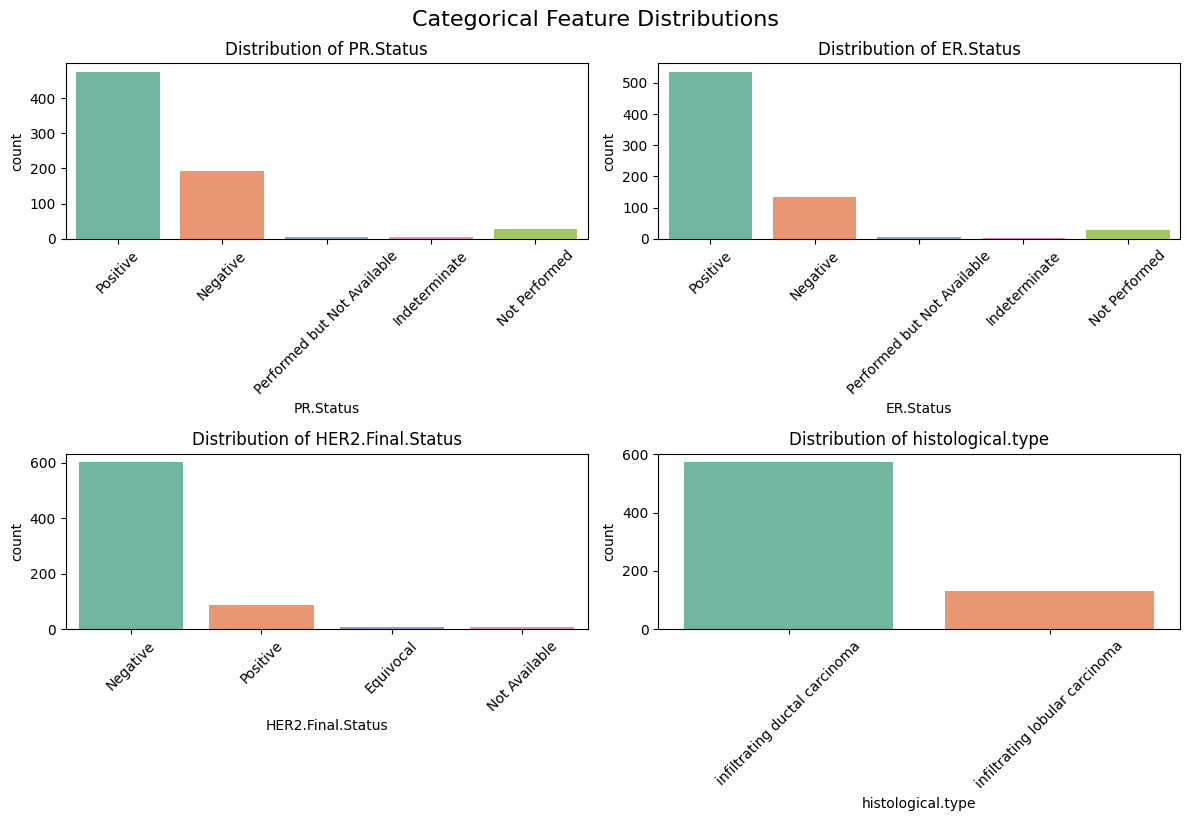

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data2, x=col, hue=col, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()


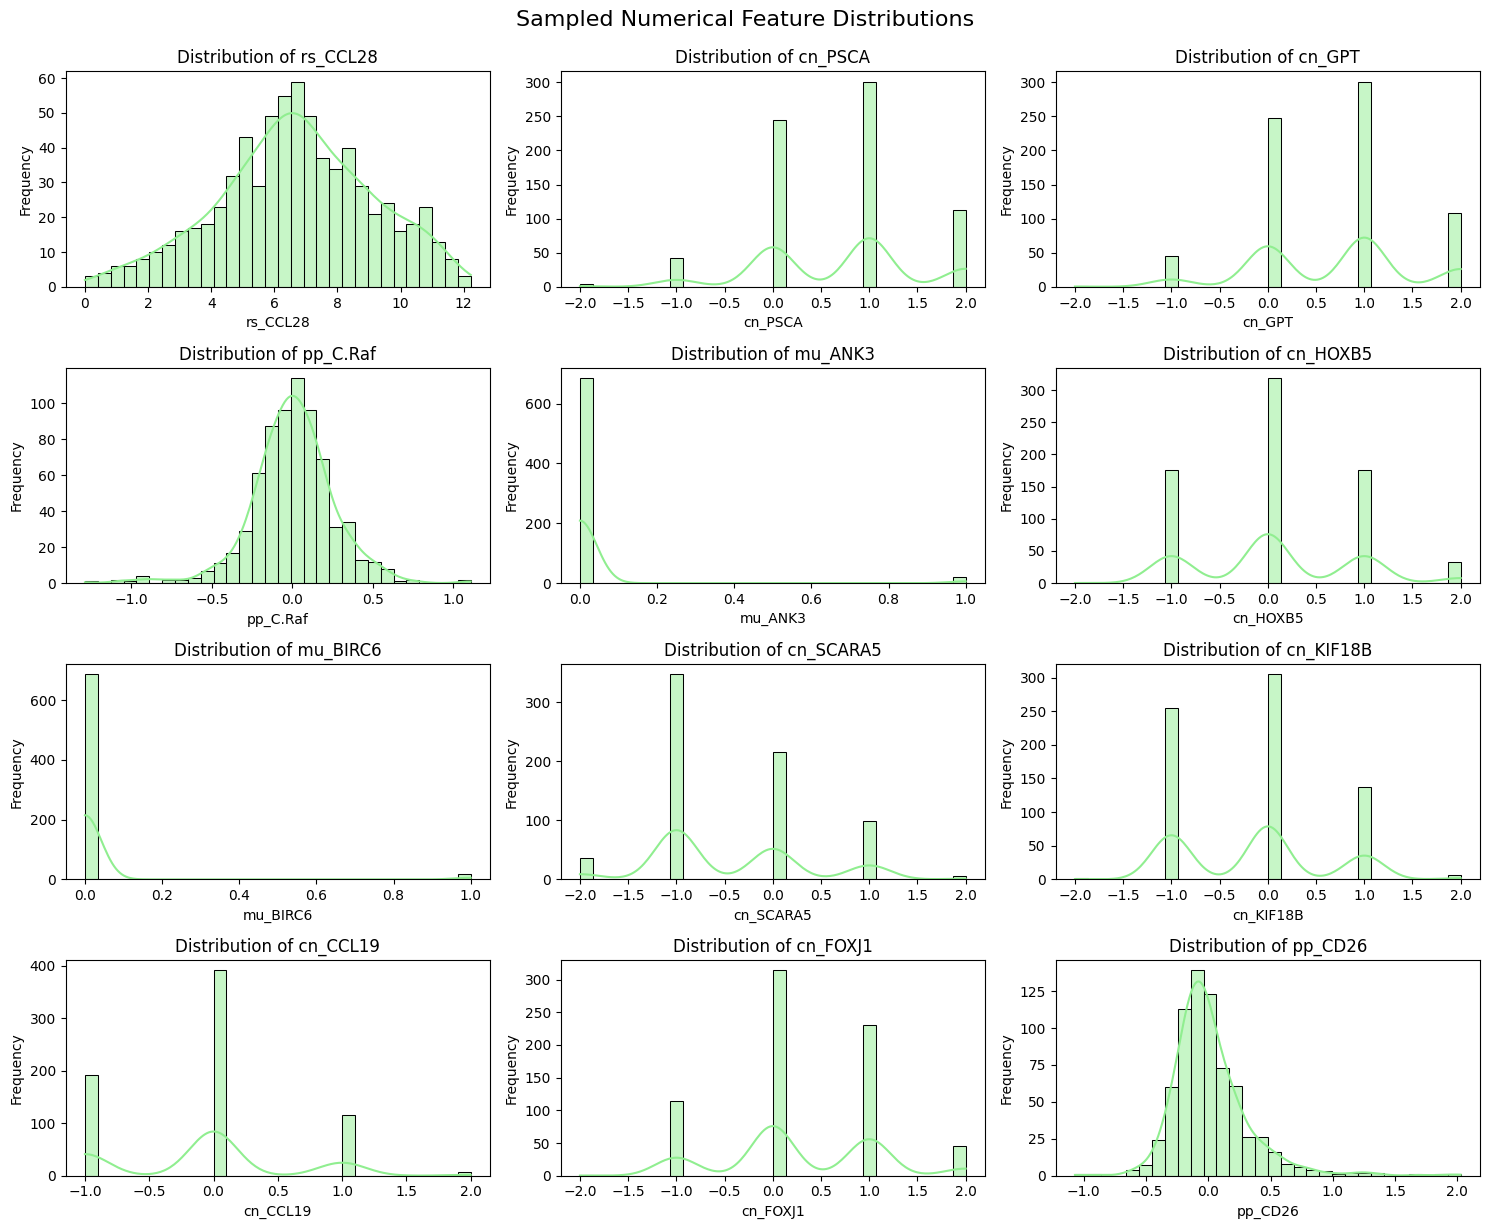

In [12]:
sampled_numerical_cols = numerical_cols.to_series().sample(n=12, random_state=42)
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(sampled_numerical_cols):
    sns.histplot(data2[col], bins=30, kde=True, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Sampled Numerical Feature Distributions", fontsize=16, y=1.02)
plt.show()

### **How does HER2 status relate to gene expressions?**


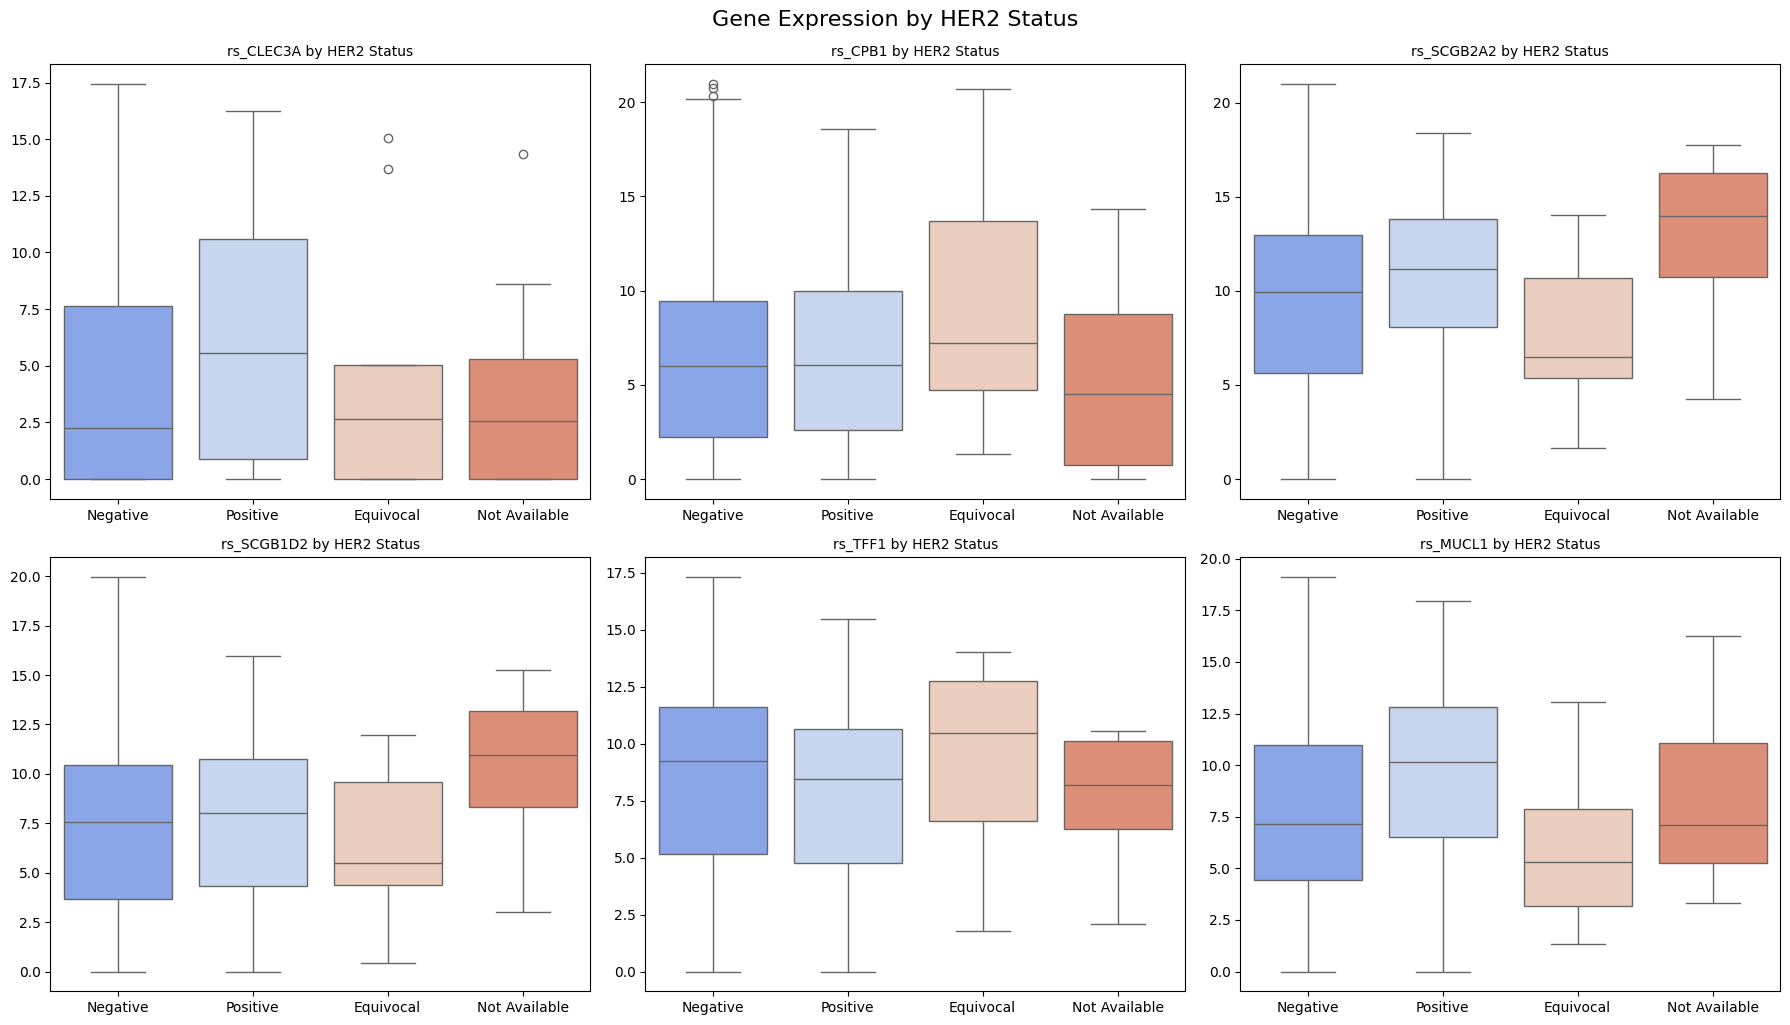

In [30]:
# Sample of gene expression columns to visualize
sample_genes = numerical_cols[:6]  # Adjust how many you want to show

# Set up grid size (2 rows, 3 columns for 6 genes)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, gene in enumerate(sample_genes):
    sns.boxplot(data=data2, x='HER2.Final.Status', y=gene, hue='HER2.Final.Status',
                palette='coolwarm', ax=axes[i], legend=False)
    axes[i].set_title(f"{gene} by HER2 Status", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle("Gene Expression by HER2 Status", fontsize=16, y=1.02)
plt.savefig("images/GEneHER2 status.png")
plt.show()


### **Is there a pattern between estrogen/progesterone receptor status and cancer subtypes?**

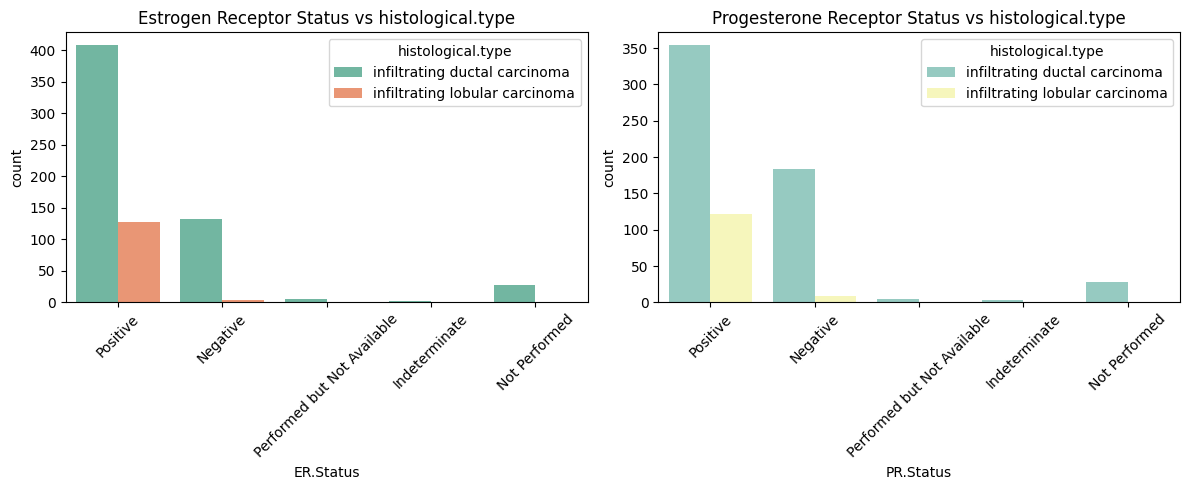

In [29]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ER.Status vs histological.type
sns.countplot(data=data2, x='ER.Status', hue='histological.type', palette='Set2', ax=axes[0])
axes[0].set_title("Estrogen Receptor Status vs histological.type")
axes[0].tick_params(axis='x', rotation=45)

# PR.Status vs histological.type
sns.countplot(data=data2, x='PR.Status', hue='histological.type', palette='Set3', ax=axes[1])
axes[1].set_title("Progesterone Receptor Status vs histological.type")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.savefig("images/hormoneReceptor_vs_Cancertype.png")
plt.show()

The figure compares the distribution of Estrogen Receptor (ER) and Progesterone Receptor (PR) statuses across two main histological types of breast cancer:

- Infiltrating ductal carcinoma

- Infiltrating lobular carcinoma

**Left Plot: ER.Status vs Histological Type**

- The majority of patients with positive ER status have infiltrating ductal carcinoma, followed by a smaller group with infiltrating lobular carcinoma.

- A noticeable number of patients with negative ER status also belong to the ductal type, but the lobular group is nearly absent here.

- Uncommon or missing statuses like Performed but Not Available, Indeterminate, and Not Performed occur very infrequently.

**Right Plot: PR.Status vs Histological Type**

- Similar to ER, most PR-positive patients have infiltrating ductal carcinoma, followed by lobular carcinoma.

- Among PR-negative patients, the ductal subtype dominates again, with a small representation from the lobular subtype.

- Rare status categories again appear very minimally.

**Conclusion**

- Both ER and PR positivity are more frequently observed in infiltrating ductal carcinoma, which also appears to be the dominant histological type overall.

- Infiltrating lobular carcinoma tends to be mostly hormone receptor-positive, with very few PR- or ER-negative cases.

- This suggests that hormone receptor status is strongly associated with histological subtype, particularly with the prevalence of hormone receptor positivity in lobular carcinomas.

### **Compare gene expression patterns for patients who are alive vs deceased (vital.status)**

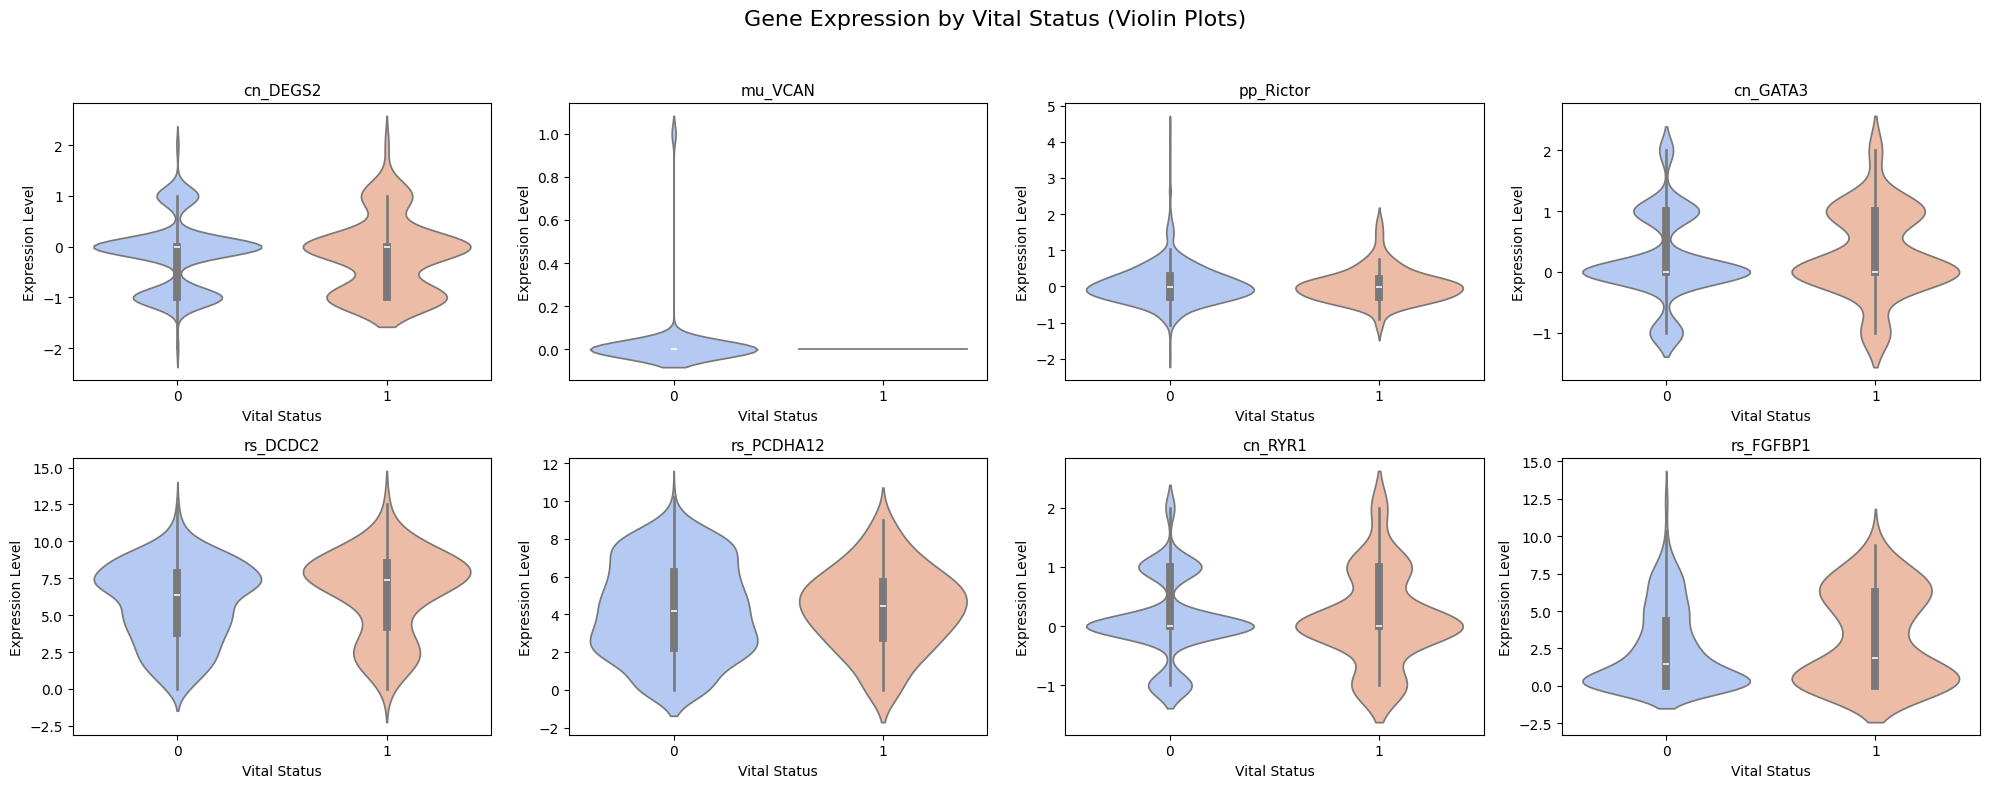

In [28]:
# Randomly select 8 gene features (excluding first 5 to avoid repetition)
np.random.seed(42)
gene_sample = np.random.choice(numerical_cols[5:], size=8, replace=False)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8), sharey=False)
axes = axes.flatten()

# Plot each gene's distribution
for i, gene in enumerate(gene_sample):
    sns.violinplot(
        data=data2,
        x='vital.status',
        y=gene,
        hue='vital.status',  # 👈 key fix for future warning
        palette='coolwarm',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{gene}", fontsize=11)
    axes[i].set_xlabel("Vital Status")
    axes[i].set_ylabel("Expression Level")

# Main title and layout
plt.suptitle("Gene Expression by Vital Status (Violin Plots)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("images/GeneExpression Patterns")
plt.show()

**1. cn_DEGS2**

- Both groups have a similar expression distribution: symmetrical, centered around 0.

- No major difference → may not be strongly associated with survival outcome.

**2. mu_VCAN**

- Alive patients (0) show slightly varied low expression.

- Deceased patients (1) show complete suppression (zero).

- Potential biomarker — loss of VCAN expression might be linked to poor prognosis.

**3. pp_Rictor**

- Slightly higher expression in alive group, but overall fairly symmetric.

- Might play a small role but likely not a strong discriminator.

**4. cn_GATA3**

- Both groups are very similar in spread and median.

- GATA3 might not be related to mortality, despite being known in subtyping.

**5. rs_DCDC2**

- Expression is wider and slightly higher in deceased group.

- Suggests more variability or overexpression in deceased → possibly linked to aggressive disease.

**6. rs_PCDHA12**

- High expression in both groups, but deceased patients have a more compressed distribution.

- Might reflect less heterogeneity in aggressive cancers for this gene.

**7. cn_RYR1**

- Similar shape and spread across groups.

- Not likely a strong marker for mortality status.

**8. rs_FGFBP1**

- Notably more spread and elevated expression in the deceased group.

- Important observation: may be overexpressed in fatal cases, making this a strong candidate gene for further study.

**Key Takeaways:**

- rs_FGFBP1 and mu_VCAN stand out as potentially meaningful biomarkers:

- FGFBP1: overexpressed in deceased.

- VCAN: expressed only in survivors.

- Other genes like cn_DEGS2, cn_RYR1, and cn_GATA3 don’t show visible differences.

In [25]:
# Get statistics (mean, median, std, IQR) per gene grouped by vital.status
summary_stats = {}

for gene in gene_sample:
    grouped = data2.groupby('vital.status')[gene]
    stats = grouped.agg(
        mean='mean',
        median='median',
        std='std',
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
    stats['IQR'] = stats['q3'] - stats['q1']
    summary_stats[gene] = stats[['mean', 'median', 'std', 'IQR']]

# Combine all into a multi-indexed DataFrame
summary_df = pd.concat(summary_stats, axis=1).swaplevel(axis=1).sort_index(axis=1)

# Display nicely
pd.set_option('display.float_format', '{:.2f}'.format)
summary_df


IQR                                                        \
             cn_DEGS2 cn_GATA3 cn_RYR1 mu_VCAN pp_Rictor rs_DCDC2 rs_FGFBP1   
vital.status                                                                  
0                1.00     1.00    1.00    0.00      0.57     4.11      4.32   
1                1.00     1.00    1.00    0.00      0.49     4.36      6.27   

                            mean           ...    median                 std  \
             rs_PCDHA12 cn_DEGS2 cn_GATA3  ... rs_FGFBP1 rs_PCDHA12 cn_DEGS2   
vital.status                               ...                                 
0                  4.04    -0.15     0.21  ...      1.46       4.18     0.67   
1                  2.95    -0.18     0.31  ...      1.85       4.43     0.72   

                                                                               
             cn_GATA3 cn_RYR1 mu_VCAN pp_Rictor rs_DCDC2 rs_FGFBP1 rs_PCDHA12  
vital.status                                                                   
0                0.71    0.70    0.15      0.56     2.67      2.70       2.47  
1                0.70    0.77    0.00      0.47     2.80      3.01       2.12  

[2 rows x 32 columns]